# Utilisation du corpus pour suivre les sujets de santé

In [86]:
import pandas as pd
import json
from glob import glob
import os
import matplotlib.pyplot as plt

Chargement des données

In [82]:
content = []
for media in ['France 2', 'TF1']:
    for year in [str(i) for i in range(2018,2022)]:
        for month in [str(i) for i in range(1,13)]:
            for day in [str(i) for i in range(1,32)]:
                path = f'../data-news-json/media={media}/year={year}/month={month}/day={day}/'
                day_files = glob(f'{path}*.json')
                for day_file in day_files:
                    for line in open(day_file):
                        subject = json.loads(line)
                        content.append(subject)

Construction du corpus

In [89]:
corpus = pd.DataFrame(content)
corpus["date"] = pd.to_datetime(corpus["date"])
corpus = corpus.set_index("date")
corpus["contenutxt"] = corpus.apply(lambda x: x["title"].lower()+" "+x["description"].lower(),axis=1)
corpus["kw_health"] = corpus["contenutxt"].str.contains("santé|soin|médecine")
corpus["kw_covid"] = corpus["contenutxt"].str.contains("covid|corona")

Représentation temporelle

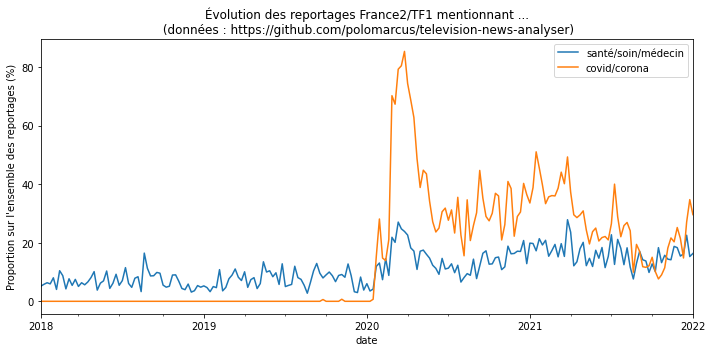

In [93]:

fig,ax = plt.subplots(figsize=(10,5))

ss = corpus["kw_health"].resample("w").agg(["sum","count"]).apply(lambda x : 100*x["sum"]/x["count"],axis=1)
ss.plot(ax=ax)

ss = corpus["kw_covid"].resample("w").agg(["sum","count"]).apply(lambda x : 100*x["sum"]/x["count"],axis=1)
ss.plot(ax=ax)

ax.set_title("Évolution des reportages France2/TF1 mentionnant ...\n (données : https://github.com/polomarcus/television-news-analyser)")
ax.set_ylabel("Proportion sur l'ensemble des reportages (%)")
plt.legend(["santé/soin/médecin","covid/corona"])
plt.tight_layout()
plt.savefig("./courbe",facecolor="white")

In [98]:
ss = corpus["kw_health"].resample("w").agg(["sum","count"]).apply(lambda x : 100*x["sum"]/x["count"],axis=1)
ss[ss.index < "2020-01-01"].mean(),ss[ss.index > "2020-02-01"].mean()

(7.261847600580747, 15.48807593561528)